In [38]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split


%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


** To get the Numerica Columns Summary **

In [4]:
train.describe()

C:\tools\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


** To get unique counts of Categorical Columns **

In [5]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

** Always plot the variables/attribure **  so that can view the data distribution

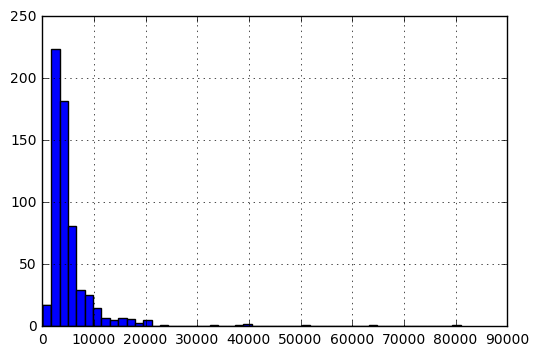

In [6]:
train.ApplicantIncome.hist(bins=50)

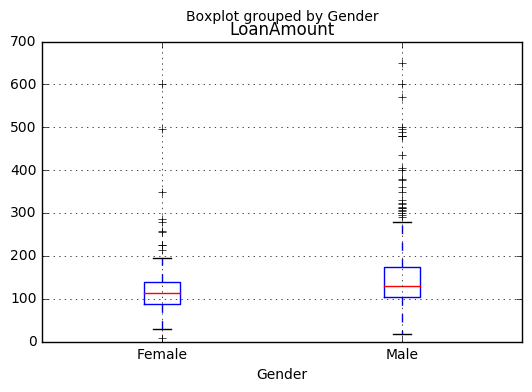

In [7]:
train.boxplot(column='LoanAmount', by = 'Gender')

In [8]:
# Approved Loan in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']
loan_approval

422

In [9]:
# Two-way comparison: Credit History and Loan Status
twowaytable = pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True)
twowaytable

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


** Mystry of missing values **

In [10]:
train['Credit_History'].isnull().sum()

50

In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Impute missing value of LoanAmount with 168 for test data set
test['LoanAmount'].fillna(168, inplace=True)

In [13]:
# Impute missing value of Gender (Male is more frequent category)
train['Gender'].fillna('Male',inplace=True)
test['Gender'].fillna('Male',inplace=True)


# Impute missing value of Credit_History ( 1 is more frequent category)
train['Credit_History'].fillna(1.0,inplace=True)
test['Credit_History'].fillna(1.0,inplace=True)

In [14]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']


# Perform log transformation of TotalIncome to make it closer to normal
train['TotalIncome_log']= np.log(train['TotalIncome'])
test['TotalIncome_log']= np.log(test['TotalIncome'])

In [15]:
#train and test dataset is already loaded in the enviornment
# Perform label encoding for variable 'Married'
number = LabelEncoder()
train['Married'] = number.fit_transform(train['Married'].astype(str))
train['Gender'] = number.fit_transform(train['Gender'].astype(str))
train['Education'] = number.fit_transform(train['Education'].astype(str))

test['Married'] = number.fit_transform(test['Married'].astype(str))
test['Gender'] = number.fit_transform(test['Gender'].astype(str))
test['Education'] = number.fit_transform(test['Education'].astype(str))

In [17]:
# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_train = train[predictors].values
y_train = train['Loan_Status'].values

# Model Building
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#test_modified already loaded in the workspace

# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_test = test[predictors].values

#Predict Output
predicted= clf.predict(x_test)

#Reverse encoding for predicted outcome
#predicted = number.inverse_transform(predicted)

#Store it to test dataset
test['Loan_Status']=predicted

#Output file to make submission
test.to_csv("Submission1.csv",columns=['Loan_ID','Loan_Status'], index=None)


In [35]:
clf_D = DecisionTreeClassifier()
clf_D.fit(x_train, y_train)
clf_D.feature_importances_

array([ 0.98712344,  0.00722166,  0.0056549 ])

In [36]:
clf_R = RandomForestClassifier()
clf_R.fit(x_train, y_train)
clf_D.feature_importances_

array([ 0.98712344,  0.00722166,  0.0056549 ])

In [28]:
#Store it to test dataset
test['Loan_Status']=clf_D.predict(x_test)

#Output file to make submission
test.to_csv("Submission2.csv",columns=['Loan_ID','Loan_Status'], index=None)

In [29]:
#Store it to test dataset
test['Loan_Status']=clf_R.predict(x_test)

#Output file to make submission
test.to_csv("Submission3.csv",columns=['Loan_ID','Loan_Status'], index=None)